<a href="https://colab.research.google.com/github/remre/striveschool/blob/main/pimlwithpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introduction to practical introduction to ML with Python


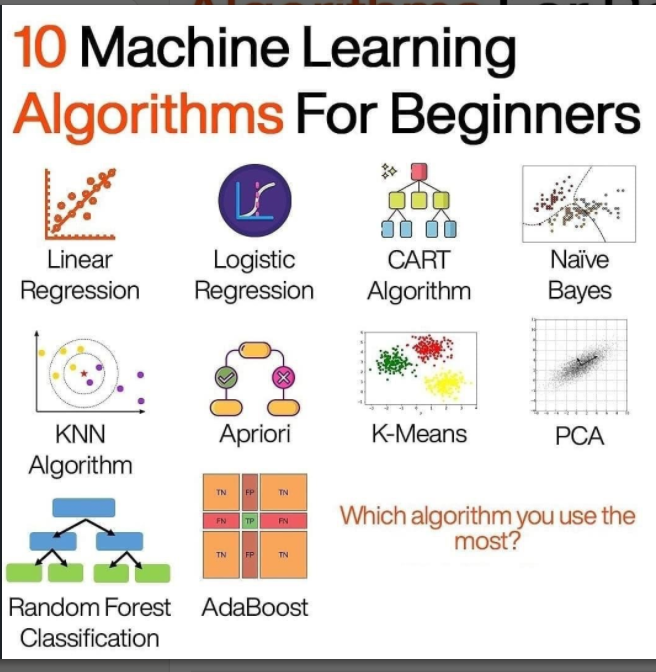

##**Regression**##

**Intro to Regression**


1.   Simple Regression
2.   Multiple Regression


> Can use to predict continuous value by some other variables




Variables distinct two types: Dependent variables and Independent variables.


To find out dependent variables usually uses historical data



### **Linear Regression**






In Simple Linear Regression there are two variables; dependent and independent variable;

y = t + t1x1


When it comes to Multiple Linear Regression the number of independent variables is more than one

In [ ]:

from sklearn.Linear_Model import LinearRegression
regressor = LinearRegression(#give the variables)
#like that easy
Can use to predict continious variables like
invar_pred = regressor.predict(X)

#####**Load and Ready your data**

Here shown below is basically same thing in different ways to appoint the type of data

In [ ]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])

###
##by means of ".values" it becomes the X as np array as like above by "np.asarray"
ataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values

#### Model Evaluation and Examples

You should specify the train and test feautures of regression

During the test we should compare the result with real results and calculate the error

Training accuracy is important However `high traning accuracy is not necessarily a good thing
Out of Sample Accuracy is predictions before train  



n


##### Train Test Split Evaluation

Work in same dataset;
build the model with respect to train set then predict
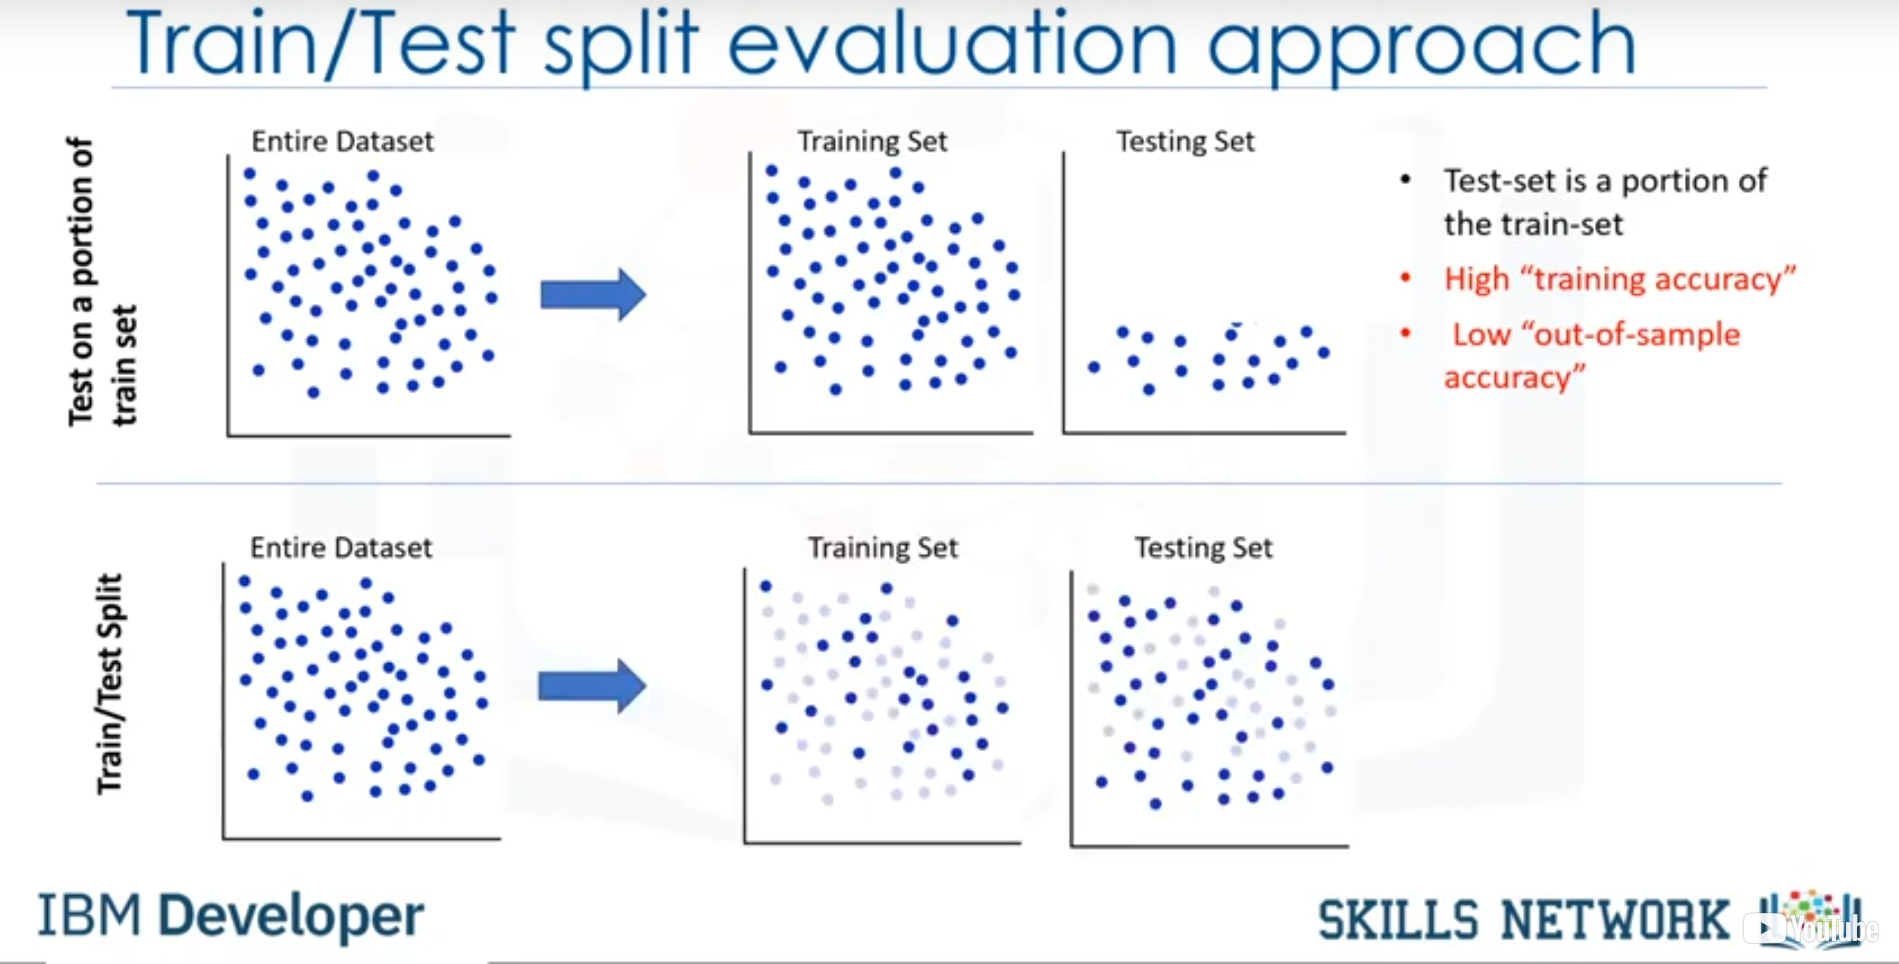

K-Validation is simplest form for multiple train and test sets, and more accurate However it is out of scope in this training 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(random_state = 1)  #some variables give test_size and random state

####Multiple Linear Regression


to understand Strength of the effects of independent variables to dependent variable and which independent variables can effect the dependent variable
Avoid the selection of indepeendent variables bcz if it is too much your model could overfitted and it is not sufficient.

Before start your linear model just scatte rthe results and check if there is a linear relationship btw your variables

###**Non-Linear Regression**

Should be Exponential

A polynomial regression model can be transformed into linear regression model



> **How can u decide to use Linear Regresion or Non-Linear Regression**


1.   Inspect visually
2.   Can calculate the correlation coeffcient between independent and dependent variables for all if it is higher than 0.7 than it is linear regression






##**Classification**

### K-nearest Neighbors

This is used for classification that choose the nearest labeled points and using them to labeled to unknown points based on similarity.
The distance between unknown value and labeled value measured and imply as dissimilarity and we should calculate the value of `dissimilarity`

evaluation metrics in classification

### **Decision Tree**

make attributes

Splitting data in right order is crucial.

Impurity must be improved during the flow chart and the enropy of the dataset should be calculated and lower entropy is better

### **Logistic Regression**

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.


The decision boundary is linear in Logistic Regression and tranform the output value to the binary value output

In multilayer perceptrons the decision boundary is non linear however the number of layer is more than logistic regression

aim is the determine each digit in the 28x28 image with logistic regression**(Beginning of Duke )**

---



In [ ]:
%matplotlib inline
#logistic regression without logistic Regression skilearn Inculed Computer Vision
import numpy as np
import torch
import torch.nn.functional as F
"""pytorch seems to be handful and torchvision packege make implementation easy """
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Training
# Initialize parameters
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()
b = torch.zeros(10, requires_grad=True)

# Optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)

# Iterate through train set minibatchs 
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b#matmul standsfor matrice multiplication
    cross_entropy = F.cross_entropy(y, labels)
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))

SyntaxError: ignored

Here are the constitute train and test data also feature scaling in two different ways

In [ ]:
#Mixed with udemy and IBM Developers
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#from sklearn.preprocessing import StandardScaler               
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)                   

In [ ]:
##Basically the same thing at the above
#from sklearn import preprocessing
#X = preprocessing.StandardScaler().fit(X).transform(X)
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [ ]:
##from sklearn.linear_model import LogisticRegression
##from sklear.metrics import confusion_matrix jaccard_score accuracy_score   Common part
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train) use train function when training then use test function when predicting as a solver  ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga can be used
## yhat = LR.predict(X_test)
## yhat_prob = LR.predict_proba(X_test)
## yhat_prob this line to show probability of real values results shows that if probability close to one or zero  P(Y=1|X)

#### *jaccard index and confusion matrix*

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat,pos_label=0)



cm = confusion_matrix(y_test, y_pred)


print(cm)


accuracy_score(y_test, y_pred)

Test results and visualizing part could be found in Drive or Colab

####**Multilayer Perceptron**

### **Naive Bayesian**

Naive Bayes methods are a set of supervised classification learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

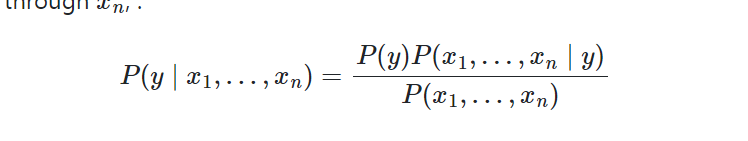

Since P(x1,x2,....xn) is given inputs assumed as a constant


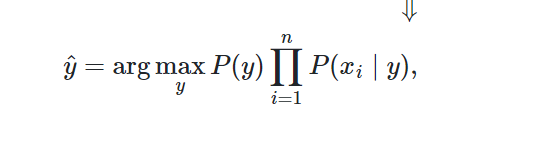

#### Gaussian NB


In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 15 points : 0


#### Multinomial Naive Bayes

MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice

In [33]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
y_predc = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_predc).sum()))
y_predc

Number of mislabeled points out of a total 15 points : 1


array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1])

####Complement NB

In [34]:
import numpy as np
rng = np.random.RandomState(1)
#X = rng.randint(5, size=(6, 100))
#y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
y_predc = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_predc).sum()))
y_predc

Number of mislabeled points out of a total 15 points : 1


array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2])

####Categorical NB

In [32]:
import numpy as np
rng = np.random.RandomState(1)
#X = rng.randint(5, size=(6, 100))
#y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
y_predc = clf.fit(X_train, y_train).predict(X_test)
y_predc
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_predc).sum()))
y_predc

Number of mislabeled points out of a total 15 points : 0


array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1])

####Bernoulli NB

In [25]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
y_predc = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_predc).sum()))

Number of mislabeled points out of a total 45 points : 32


##**Clustering**

###**k-Means**

some tools


from sklearn.cluster import KMeans 



from sklearn.datasets.samples_generator import make_blobs



##Deep Learning##

Emprical Risk Minimization

loss function defined as a penalty for a poor prediction




###Convolutional Neural Networks(CNN)

Convolutional neural networks (CNNs) are a class of neural networks that have convolutional layers. CNNs are particularly effective for data that have spatial structures and correlations (e.g. images)



Convolutional should be considered as shifting the core image all over the picture




In [ ]:
###Duke University CNN lab assignments 
"""there are some embarked points which should be changed as considered 
CNNs expect a 4-D input, so we no longer have to reshape the images before feeding them to our neural network.
Since CNNs are a little more complex than models we've worked with before, we're going to increase the number of epochs (complete passes through the training data) during training.
We switch from a vanilla stochastic gradient descent optimizer to the Adam optimizer, which tends to do well for neural networks."""



import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Training
# Instantiate model  
model = MNIST_CNN()  # <---- change here

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # <---- change here

# Iterate through train set minibatchs 
for epoch in trange(3):  # <---- change here
    for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        x = images  # <---- change here 
        y = model(x)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images  # <---- change here 
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

Reusing a pretrained model is a technique known as **transfer learning**



---


When doing **transfer learning**, it's generally not a good idea to retrain the entire base -- at least not without some care

In [ ]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu')

    ##### Im not sure if these are same??


    image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in lesson 4!
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))

image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))


##**Natural Language Process**

In [ ]:

if the words close(imagine like locationalyy) we consider they are similiar


Key point is mapping every word to a vector


we dont need to a true labeled data which constitute by humans

---
Codebook is a set of vectors whre every word in the vocabulary is mapped to a vector


SyntaxError: ignored

#####*Softmax Function*

We can consider Softmax is kind of generilized Logistic Regression instead of binary ouput  it must be more complicated

#####*Continuous Bag of Words and Skip-Gram*

Doesnt matter the order of words,
Try to find where is the words